In [63]:
# %matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(color_codes=True)

In [4]:
np.random.seed(sum(map(ord, "distributions")))

In [5]:
x = np.random.normal(size=10000)
sns.distplot(x)



In [6]:
sns.distplot(x, kde=False, rug=True);

In [7]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
print df.head()


          x         y
0 -0.208910  1.024767
1 -1.575370 -1.101655
2 -0.694578  0.172188
3 -1.555686 -0.480768
4  0.128076  0.444223


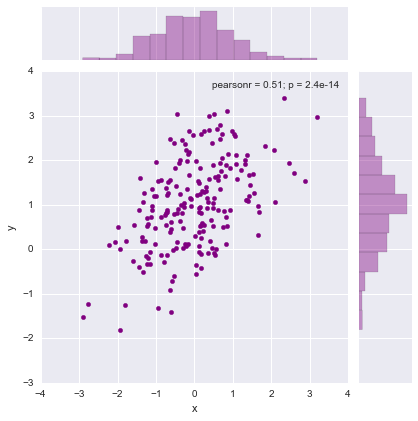

In [86]:
sns.jointplot(x="x", y="y", data=df,color="purple");

In [87]:
x, y,z = np.random.randn(3, 1000)

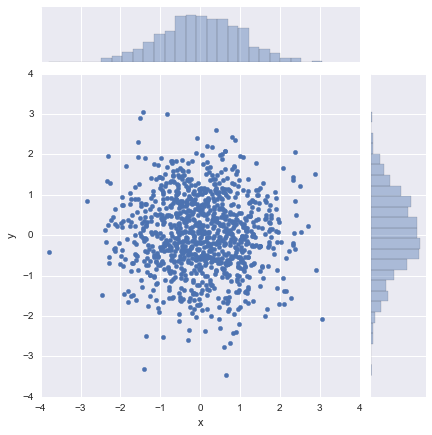

In [88]:
g = (sns.jointplot(x, y, kind="scatter", stat_func=None,hue = "")
       .set_axis_labels("x", "y"))

In [117]:
type(df)

pandas.core.frame.DataFrame

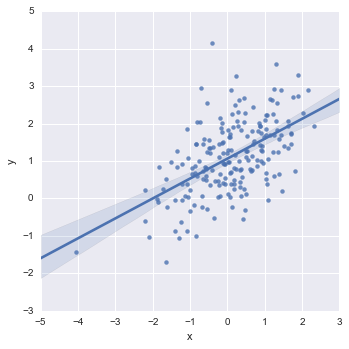

In [113]:
sns.lmplot("x","y",data=df)

IndexError: string index out of range

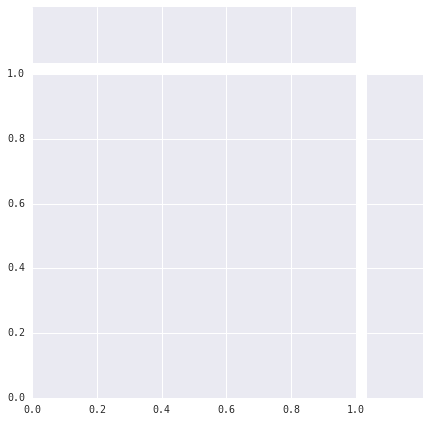

In [181]:
g = sns.jointplot("x", "y", data=df, kind="reg", size=7)

In [128]:
df = sns.load_dataset("anscombe")

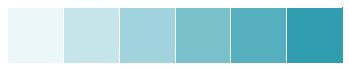

In [131]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

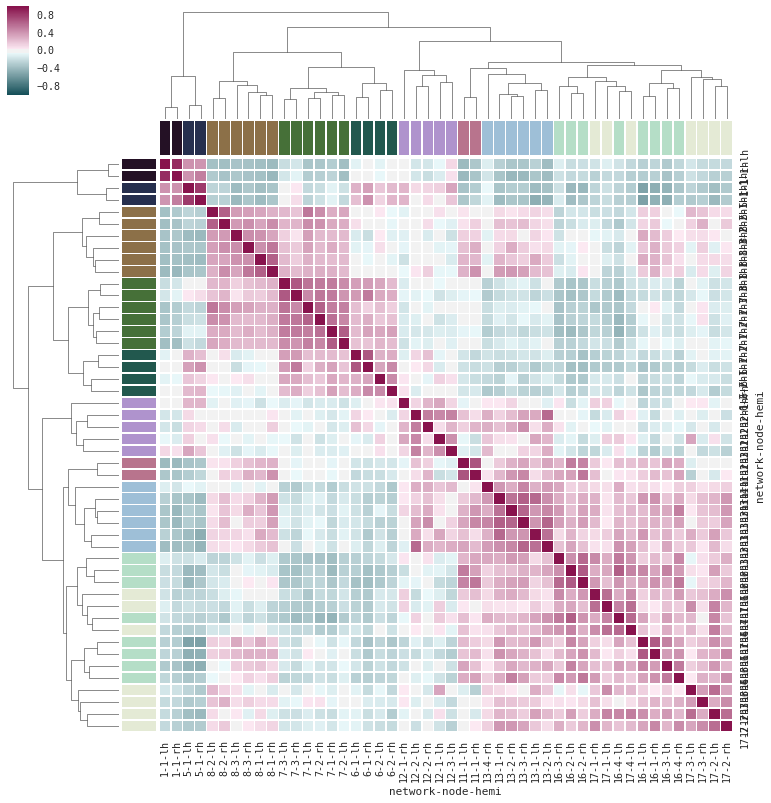

In [136]:
sns.set(font="monospace")

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks).map(network_lut)

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

# Draw the full plot
sns.clustermap(df.corr(), row_colors=network_colors, linewidths=.5,
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)

In [138]:
print df.head()


network          1                     5                     6             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1        55.547253  43.690075  19.568010  15.902983 -23.231823 -10.745867   
2        60.997768  63.438793  19.247454  37.209419   2.392153  16.509109   
3        18.514868  12.657158  32.896915  11.199619 -14.665752   2.073715   
4        -2.527392 -63.104668  18.396759   3.219077 -41.856911 -24.690414   

network                                7               ...             16  \
node             2                     1               ...              3   
hemi            lh         rh         lh         rh    ...             rh   
0       -47.664265  12.284122   1.566538 -13.042585    ...       0.607904   
1        10.269546  31.275831 -26.309488 -18.077026    ...      57.495071  

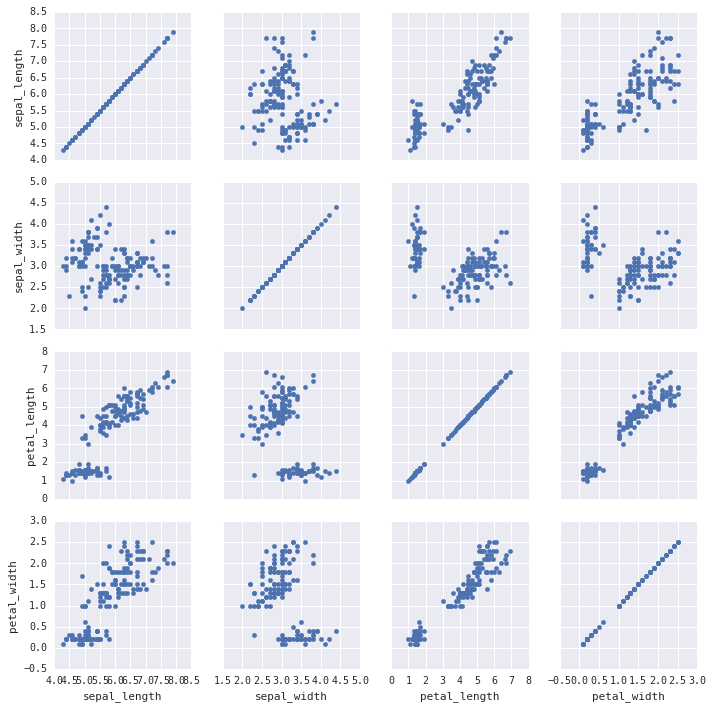

In [139]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

In [140]:
print iris


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

2.4651658535


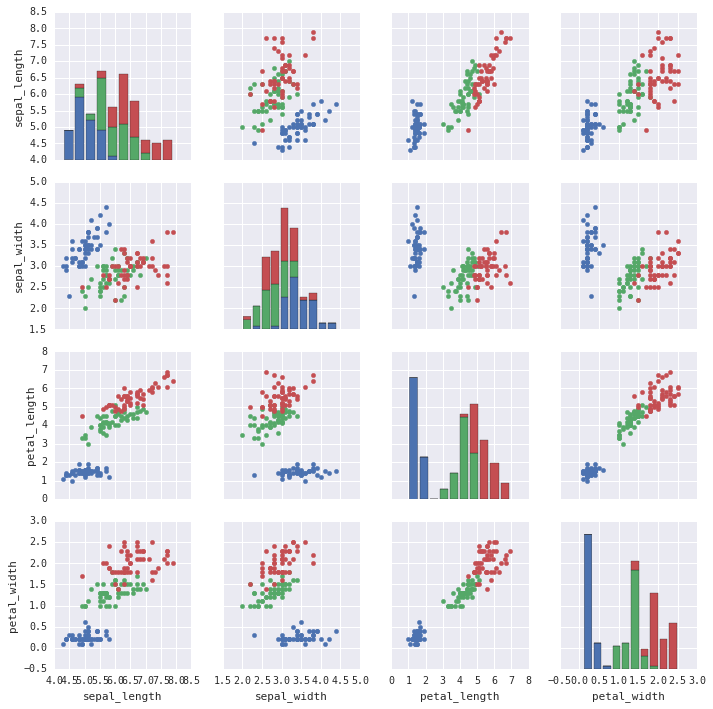

In [145]:
from time import time
t0 = time()
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

print time()-t0

3.30710101128


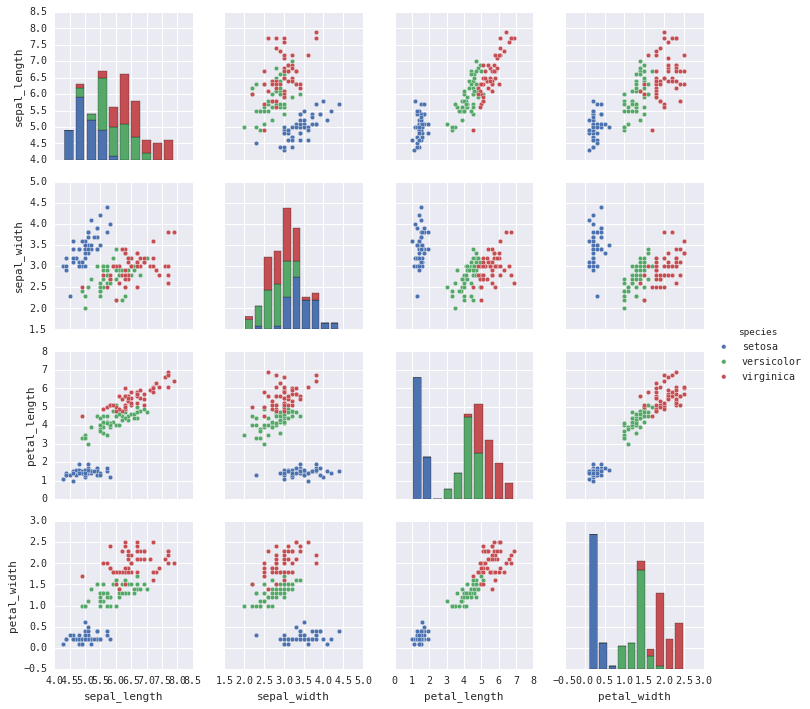

In [146]:
from time import time
t0 = time()
sns.pairplot(iris,hue = "species",size = 2.5)
print time()-t0

In [149]:
student = pd.read_csv("student-data.csv")

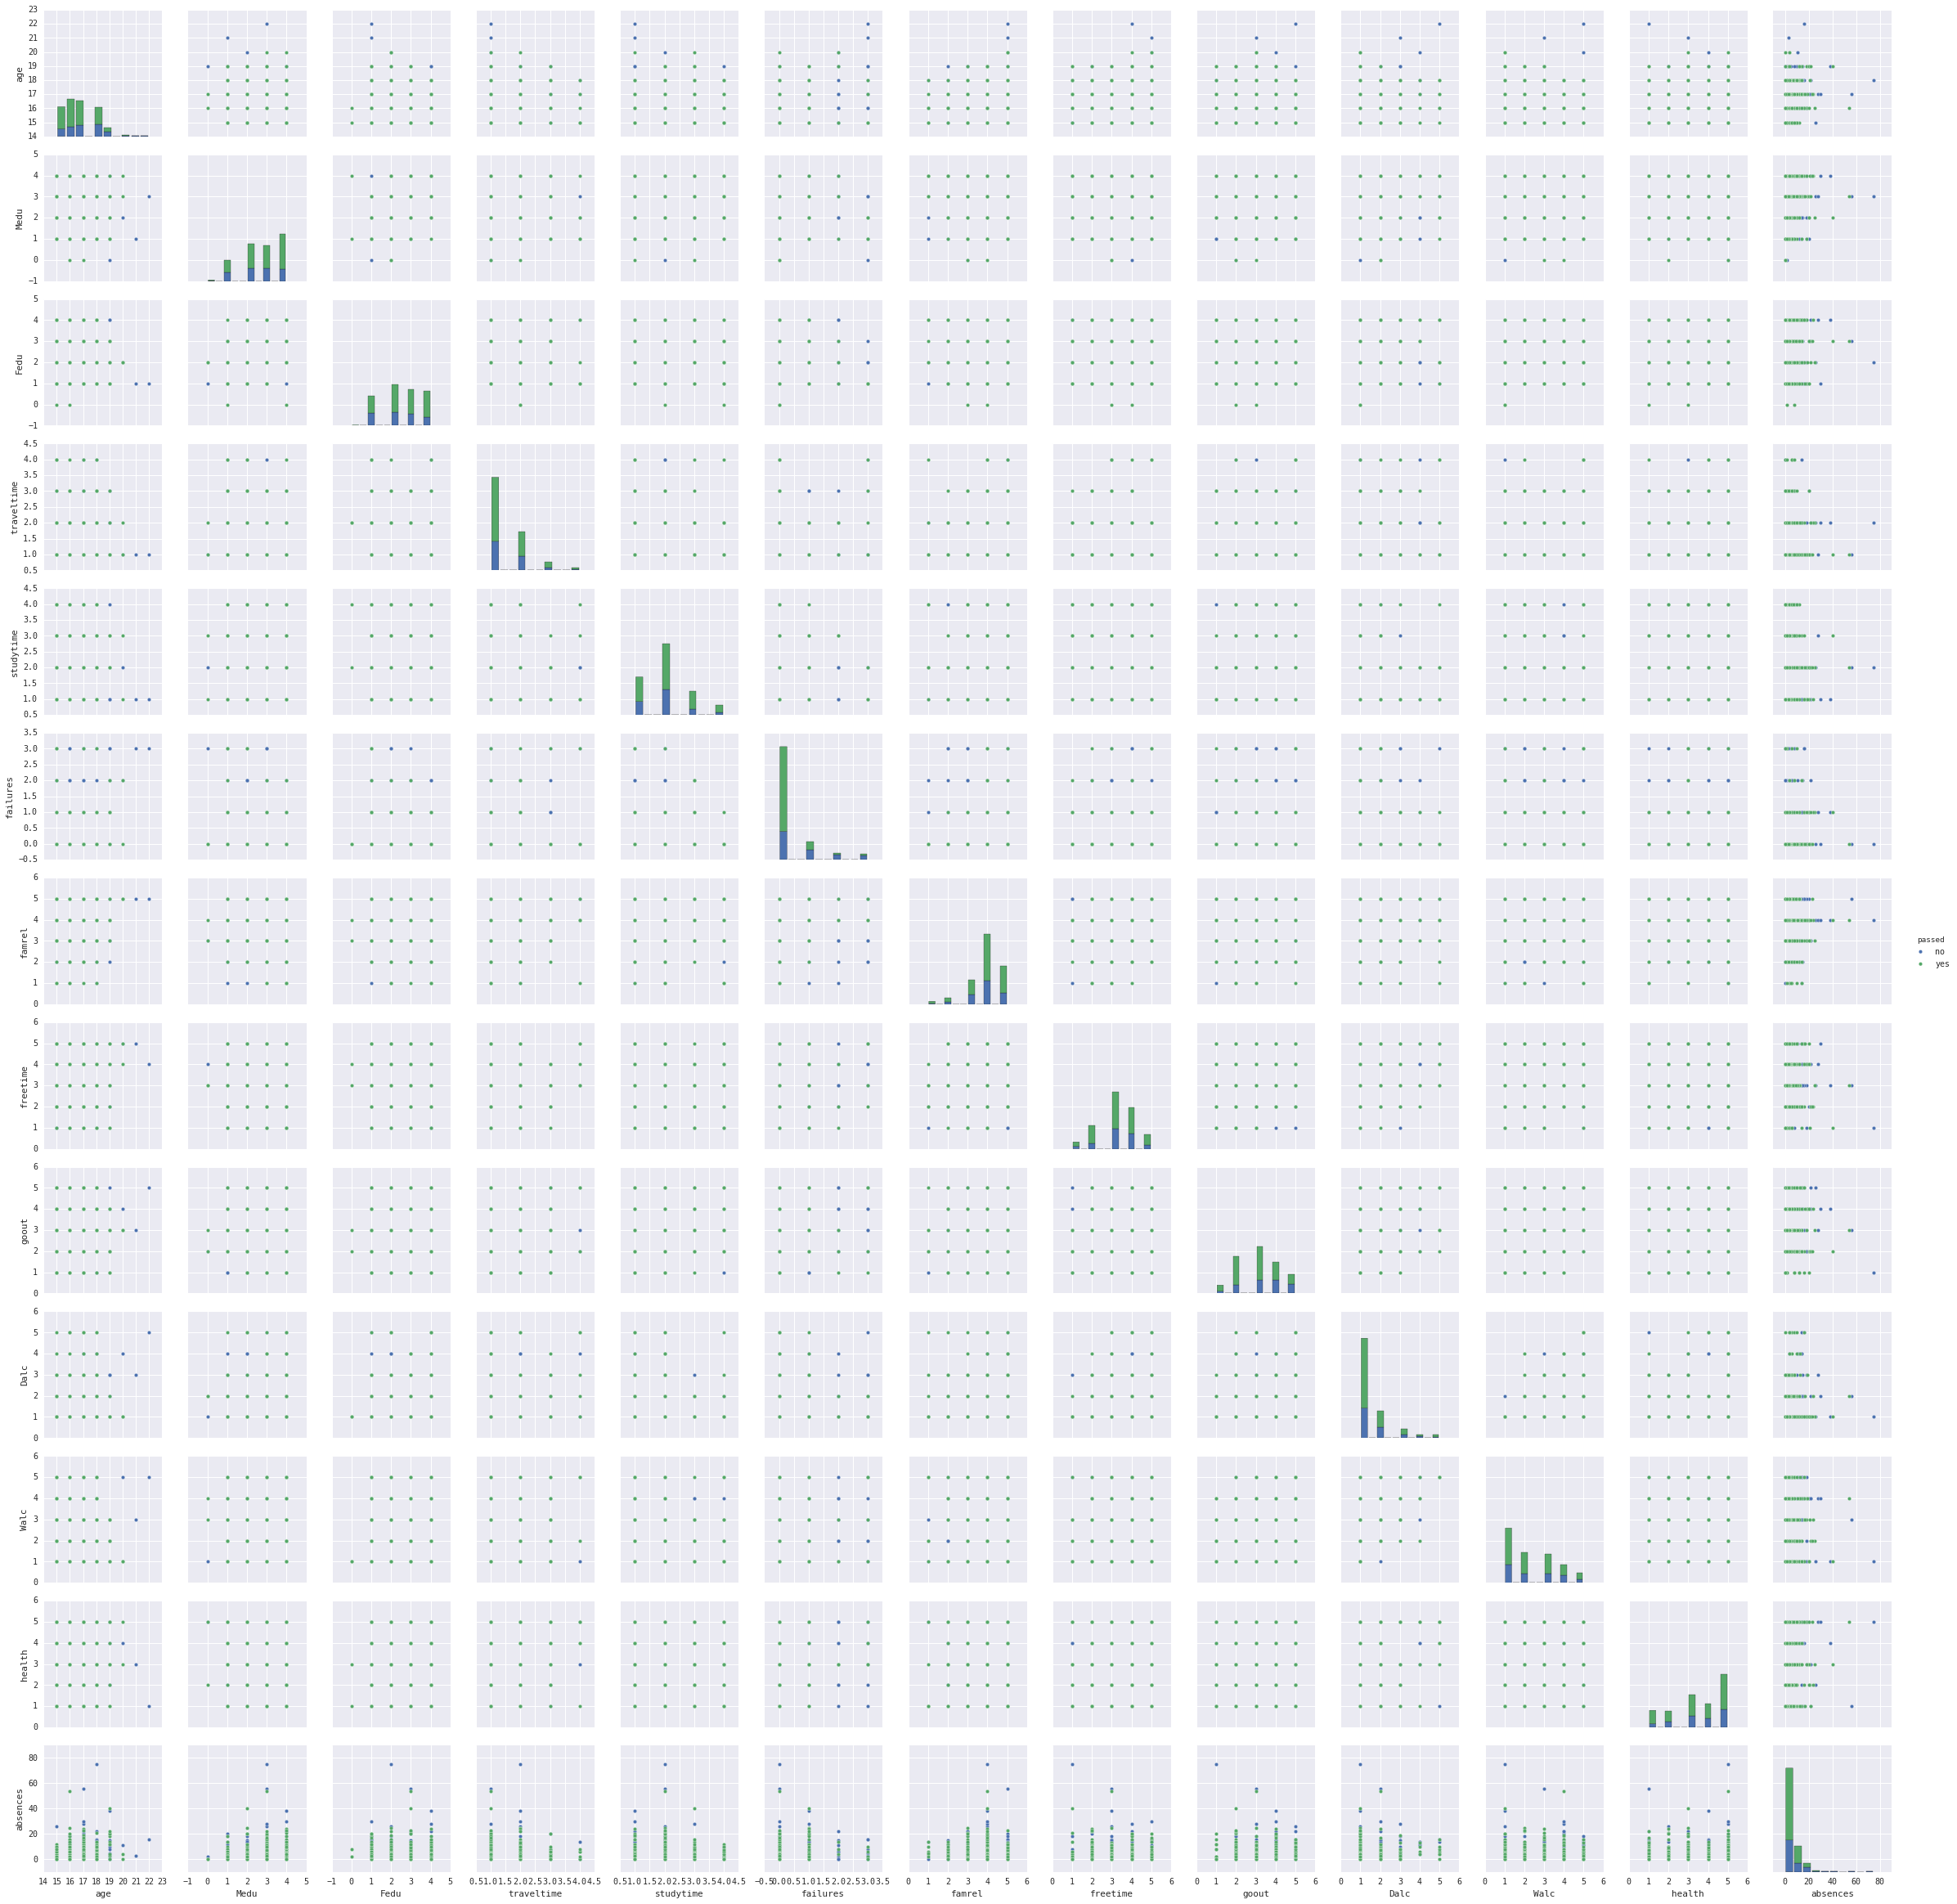

In [150]:
sns.pairplot(student,hue = "passed",size = 2.5)

In [153]:
print list(student.columns)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed']


In [154]:
u = [['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
      'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
      'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 
      'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed']]

In [155]:
w = student[u]

In [156]:
print w.head()


  school sex  age
0     GP   F   18
1     GP   F   17
2     GP   F   15
3     GP   F   15
4     GP   F   16


In [160]:
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

student = preprocess_features(student)

In [161]:
print list(student.columns)

['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed']


In [171]:
stu_1 = ['school_GP', 'sex_F', 'age','address_R', 'famsize_GT3', 'passed']
stu_2 = ['Medu', 'Fedu', 'Mjob_at_home','Mjob_health', 'Mjob_other', 'passed']
stu_3 = ['Pstatus_T' , 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'passed']
stu_4 = ['Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'passed']
stu_5 = ['reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'passed']
stu_6 = ['traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'passed']
stu_7 = ['paid', 'activities', 'nursery', 'higher', 'internet', 'passed']
stu_8 = ['romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'passed']
stu_9 = ['Walc', 'health', 'absences', 'passed']

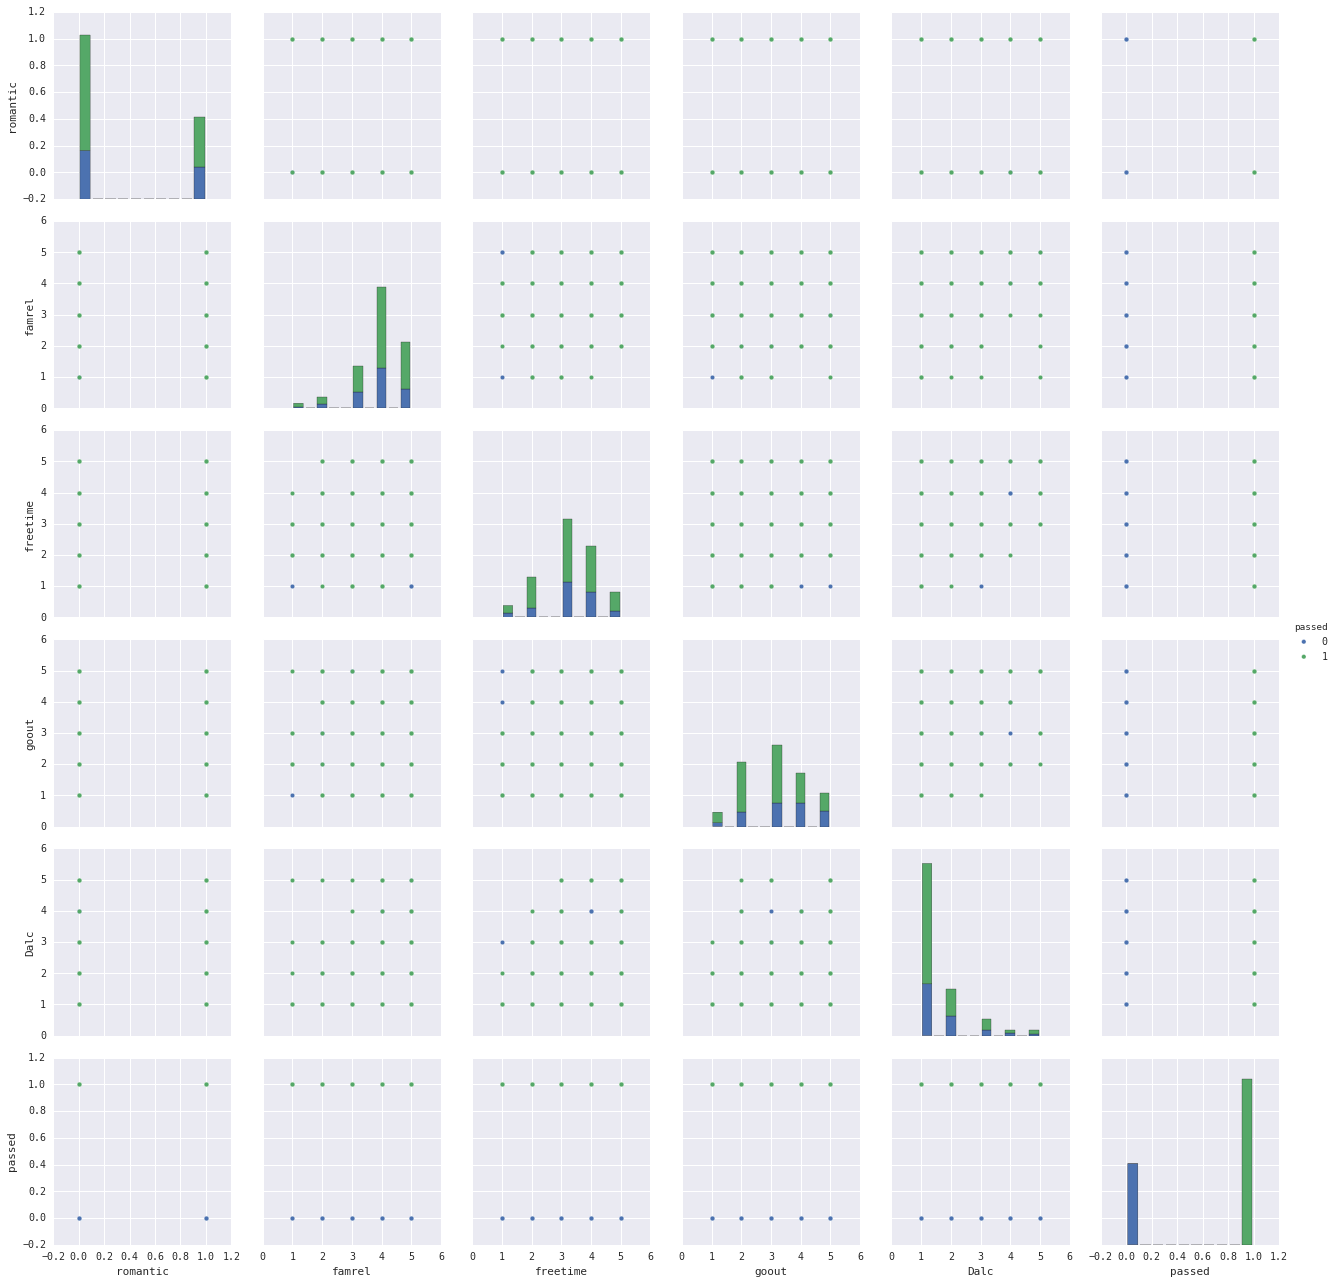

In [180]:
sns.pairplot(student[stu_8], size=3, hue = "passed")

In [189]:
a = 3
if a == 3:
    print a
elif a != 2:
    print 2

3


In [ ]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex']=='female':
            predictions.append(1)
        else:
            if passenger['Sex']=='male' and passenger['Age'] < 10:
                predictions.append(1)
            else:
                if passenger['Sex']=='male' and passenger['Age'] > 10 and passenger['Pclass']==0:
                    predictions.append(1)
                else:
                    if passenger['Sex']=='male' and passenger['Age'] > 10 and passenger['Pclass']!=0 and passenger['SibSp']==1:
                        predictions.append(1)
                    else:
                        if passenger['Sex']=='male' and passenger['Age'] > 10 and passenger['Pclass']!=0 and passenger['SibSp']!=1 and passenger['Parch']==1:
                            predictions.append(1)
                        else:
                            predictions.append(0)
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)
